# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [28]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Understanding the structure of the data

In [30]:
# read the data
df = pd.read_csv('/Users/sylviaanthony/Desktop/Sylvia_Python_Prog/Data/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [31]:
print ("No of columns in the data  : ",df.columns.shape[0])
print ("No of rows in the data     : ",df.shape[0] )

#Another way of checking rows and colums in the data 

print ( "No of rows and columns in the data (R,C) : " , df.shape)

No of columns in the data  :  9
No of rows in the data     :  1898
No of rows and columns in the data (R,C) :  (1898, 9)


#### Observations:
There are 1898 rows and 9 columns in the data (exchuding the header).

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [32]:
# Use info() to print a concise summary of the DataFrame
df.info()
#df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are 4 columns with data type int , 4 columns with datatype as object as 1 column with float datatype. Ideally, rating column should have datatype as int so as to be able to perform calculations on it. Customer_id can also be a categorical/string data and not necessarily a number as we cannot perform any calculations on the customer_id 

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [33]:
df.columns.isnull().sum()

0

### Observations:
There are no missing values in the data , however the ratings column has 'Not given' values which is equivalent to null values

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [34]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


### Observations:  
In the dataset for foorhub , there are 1898 rows which correspond to 1898 orders place by the customer

Time :
Minimum time for food to be prepared - 20 

Average time for food to be prepared - 27.37

Maximum time for food to be prepared - 35



Cost of the order:

Minimum cost of the order  - 4.47

Average cost of the order  - 16.49

Maximum cost of the order  - 35.41




Preparation time :

Minimum time to prepare the order  - 20

Average time to prepare of the order  - 27.37

Maximum time to prepare of the order  - 35


Delivery time :

Minimum time to deliver the order  - 15

Average time to deliver the order  - 24.16

Maximum time to deliver the order  - 33


### **Question 5:** How many orders are not rated? [1 mark]

In [35]:
#METHOD 1 : using shape[0] to find the no of rows meeting the condition
df.loc[(df['rating']=='Not given')].shape[0]

736

In [36]:
#METHOD 2 : using value_counts() to count the no of rows  
df.loc[(df['rating']=='Not given')].value_counts('rating')

rating
Not given    736
dtype: int64

### Observations:
There are 736  orders that were not rated by the customers

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

order_id
customer_id
restaurant_name
cuisine_type
cost_of_the_order
day_of_the_week
rating
food_preparation_time
delivery_time

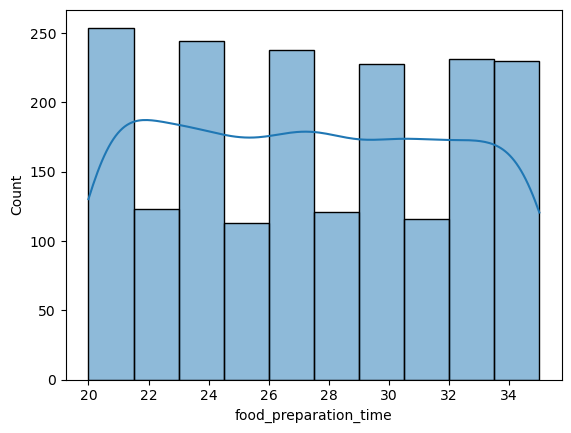

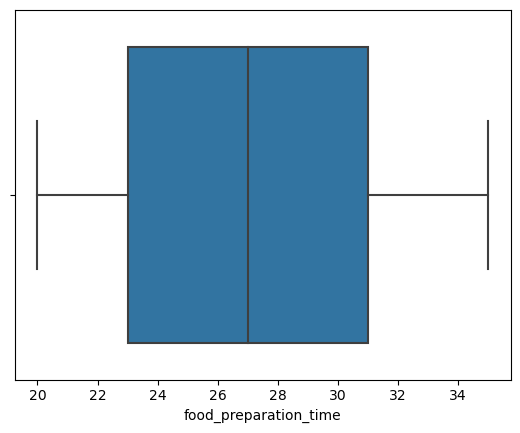

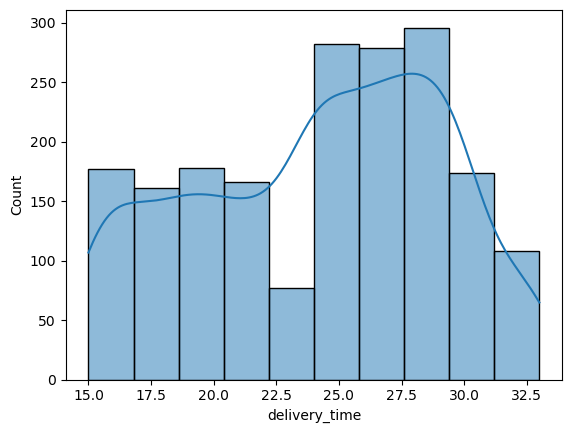

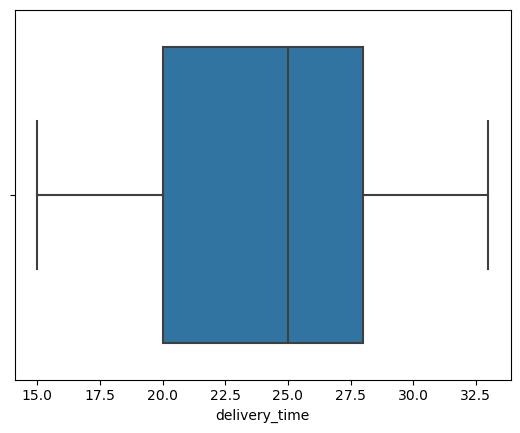

In [37]:
# using histplots/ boxplots/ countplots for univariate analysis 

sns.histplot(data=df,x='food_preparation_time',stat = 'count',bins = 10,kde=True)
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()


sns.histplot(data = df, x='delivery_time', stat = 'count',bins = 10,kde = True,)
plt.show()
sns.boxplot(data = df, x='delivery_time')
plt.show();

### Observations for food_preparation_time and food_delivery_time: 

The median preparation time is about 27 minutes and the graph is not particularly skewed in any direction

The median delivery time is about 25 minutes and the graph is left skewed 
From the histplot we can determine that 50 percentile orders take between 20 and 28 minutes (approx) to be delivered.










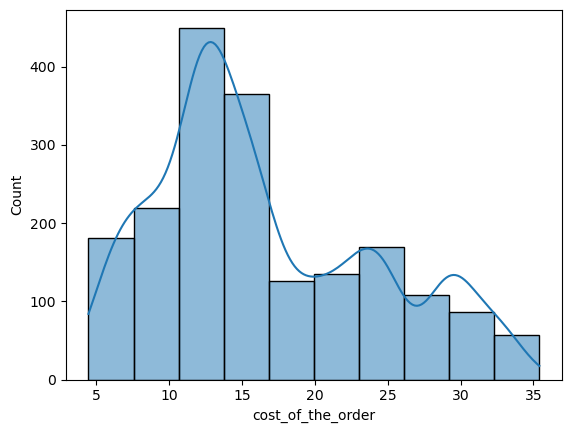

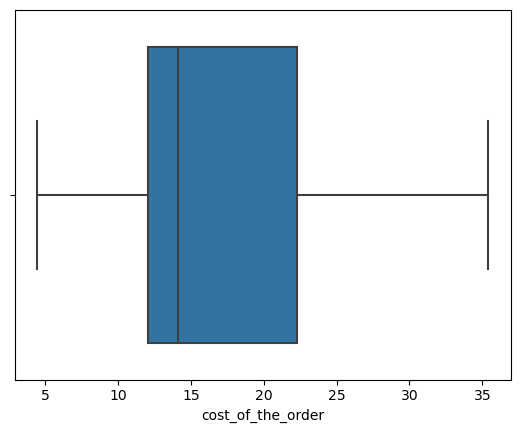

In [38]:
sns.histplot(data = df, x='cost_of_the_order', stat = 'count',bins = 10,kde=True)
plt.show()
sns.boxplot(data = df, x='cost_of_the_order')
plt.show();

### Observations 
The histplot is skewed to the right,  however we note that there is a slight peak at around 25 dollars and 30 dollars. 
The boxplot shows the median cost is around 14 dollars, with the orders being right skewed 


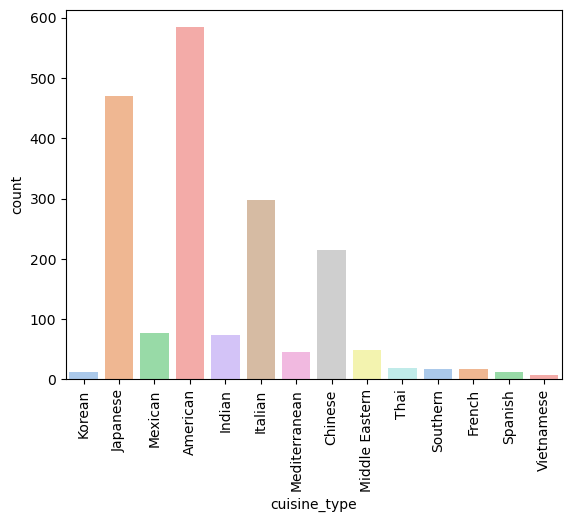

In [39]:
sns.countplot(data=df,x='cuisine_type' ,palette = "pastel")
plt.xticks(rotation=90)
plt.show()

### Observation on cuisine type 

The most popular cuisines are American, Japanese,Italian,Chinese which is followed by Mexican and Indian 

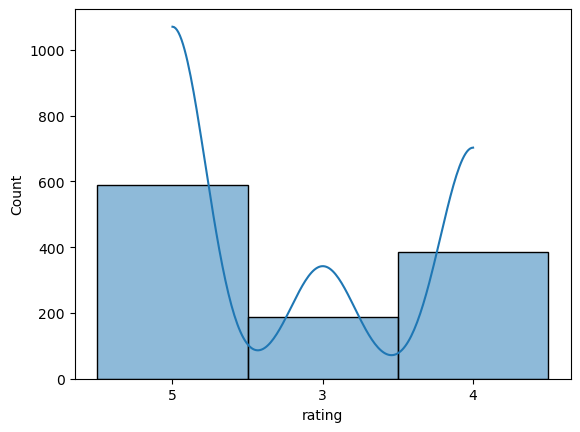

In [40]:
df_rating = df[df['rating']!= 'Not given']
#df_rating1=df_rating['rating'].astype(float)
sns.histplot(data = df_rating, x=df_rating['rating'] ,stat = 'count',kde = True)
plt.show()



### Observation 

Majority of the ratings are 5 star , followed by 4 star and 3 star 

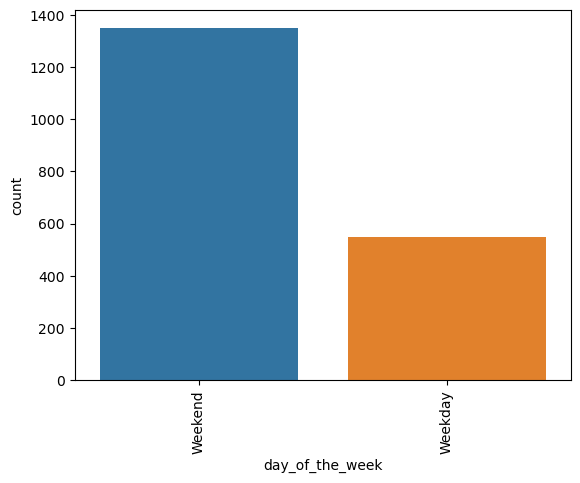

In [41]:
sns.countplot(data=df,x='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

### Observation 

Majority of the orders are placed on the weekend 

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [42]:
# using groupby() to group restaurants by no of orders,
# then sorting values in descending order and then retrieving top 5 from that list
df.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False).head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64

In [43]:
#counting no of rows against each restaurant as each row corresponds to an order , then sorting and getting top 5 

df['restaurant_name'].value_counts().sort_values(ascending=False).head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

### Observations:
Top 5 restaurants in terms of numbers of orders received are Shake Shack with 219 orders,
The Meatball Shop delivering 132 orders,Blue Ribbon Sushi with 119 orders,Blue Ribbon Fried Chicken with 96 orders 
and Parm delivering 68 orders 

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [44]:
# filtering the rows using loc[] , based on day_of_the_week filter and then counting the cuisine_type to find popular cuisine
df.loc[df['day_of_the_week']=='Weekend'].value_counts(['cuisine_type'])

cuisine_type  
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
dtype: int64

### Observations:
American cuisine is the most popular cuisine on the weekends with 415 orders

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [45]:
# Filtering cost_of_the_order using loc[] , then calculating the % and rounding off to 2 decimal values
round(df.loc[df['cost_of_the_order']> 20]['order_id'].count()*100/df['order_id'].count(),2)

29.24

###  Observations:
29.24% of the orders cost more than 20 dollars 

### **Question 10**: What is the mean order delivery time? [1 mark]

In [46]:
# using mean()  to find the avg delivery time
#df.head()
round(df['delivery_time'].mean(),2)


24.16

###  Observations:
Mean order delivery time is 24.16 mins

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [47]:
# using value_counts() ot find the no of order against each customer_id  ,
# then sorting in descending and retrieveing top 3


df['customer_id'].value_counts(ascending=False).head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

###  Observations:
Customer ID of the top 3 customers with most frequent orders are 52832,47440 and 83287

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


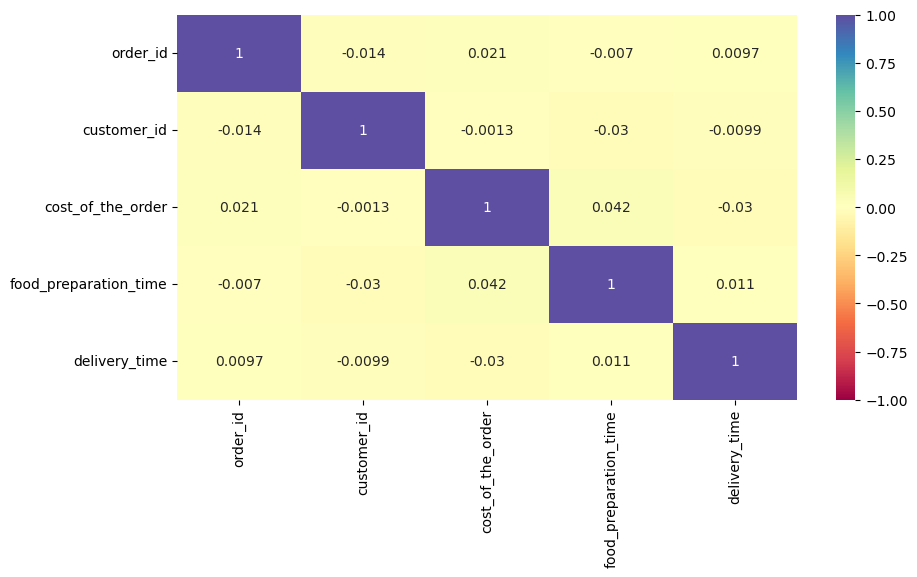

In [48]:
# using corr() to find relation between two variables 
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

### Observations:
Above heatmap shows weak correlation between all the varibles as none of them are above 0.68 or above which is an indicator for strong correlation

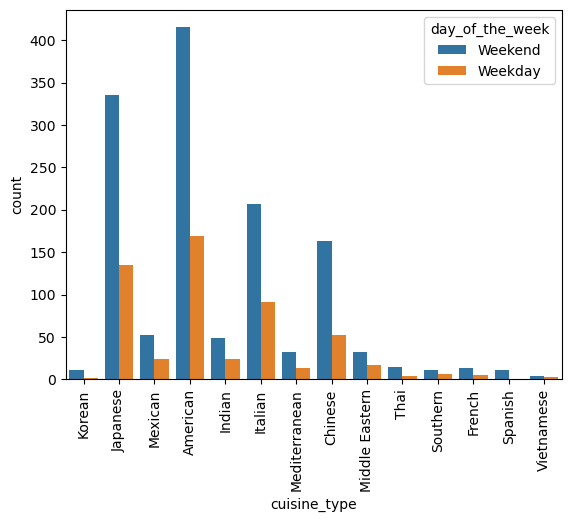

In [49]:
#using countplot to graphically represent cuisine_type filtered by day_of_the_week and count of orders against them

sns.countplot(data=df,x='cuisine_type',hue= 'day_of_the_week')
plt.xticks(rotation=90)
plt.show()

### Observation :
American and Japanese cusisine are popular on all days as per the demand. 
The no of orders on weekdays is lesser compared to that on weekends.



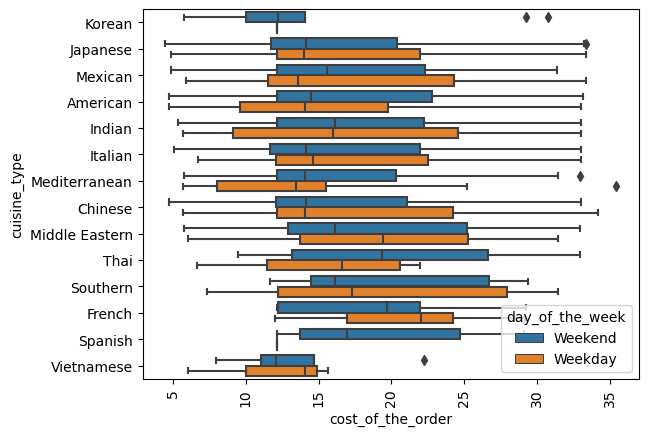

In [50]:
#using boxplot to represent cuisine_type filtered by day_of_the_week and cost_of_the_order of orders against them


sns.boxplot(data=df,x='cost_of_the_order',y='cuisine_type' , hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show();

### Observation:

Most size of the order is similar for weekday or weekend.
Also, there are some outliers for Vietnamese, Mediterranenan and Korean cuisine and mostly on weekends.

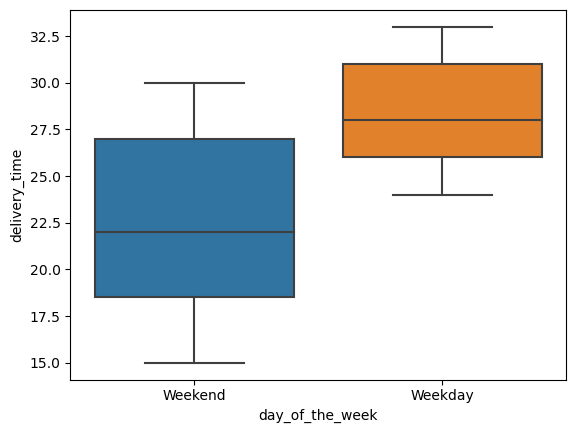

In [51]:
#using boxplot to represent delivery_time vs delivery_time to see if there is difference based on day of the week



sns.boxplot(data=df,x='day_of_the_week',y='delivery_time') 
plt.show()

### Observation : 

Delivery time taken is higher on the weekday despite less no of orders


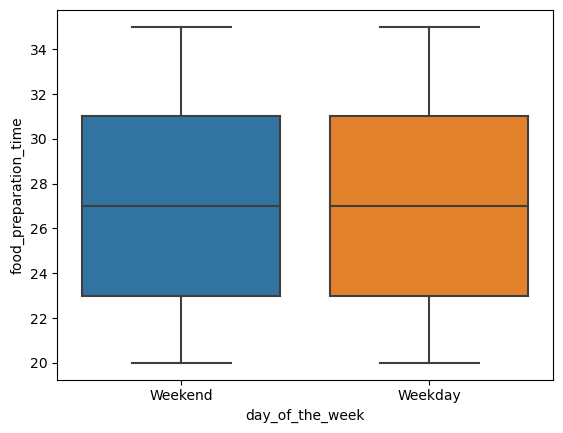

In [52]:
# boxplot to represent food_preparation_time vs delivery_time to see if there is difference based on day of the week

sns.boxplot(data=df,x='day_of_the_week',y='food_preparation_time') 
plt.show()

### Observation:

Median Food preparation time does not change , irrespective of the day of the week

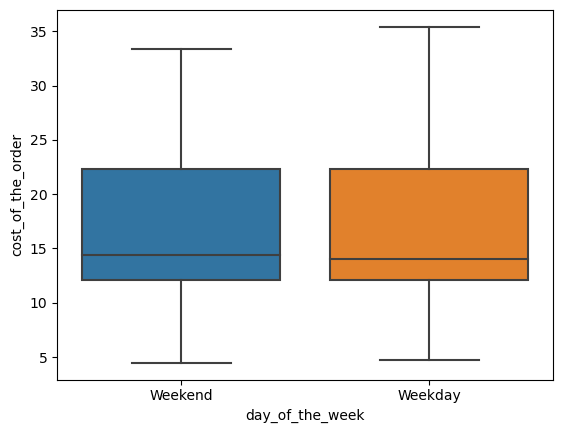

In [53]:
#boxplot to check if cost_of_the_order varies by day_of_the_week

sns.boxplot(data=df,x='day_of_the_week',y='cost_of_the_order') 
plt.show()

### Observation:

Median cost of the order is also similar irrespective of the weekday or weekend 

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [55]:
#METHOD 1 


df3 = df[['restaurant_name','rating']]  
df4=df3.loc[df3['rating']!= 'Not given']     #removing ratings that are 'Not given'
df4['rating']=df4['rating'].astype(float)    #changing datatype to float
summary = df4.groupby('restaurant_name').agg({'rating': ['count', 'mean']})   #getting aggregate values using agg()
#summary
summary.columns = ['no_of_ratings', 'average_rating']
summary.loc[(summary['no_of_ratings']>50)&(summary['average_rating']>4)]


/var/folders/lc/jhnm0hqx6hx4nf_1fjnnfxn80000gn/T/ipykernel_2656/2979977918.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['rating']=df4['rating'].astype(float)    #changing datatype to float


,no_of_ratings,average_rating
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


In [56]:
#METHOD 2 



df3 = df[['restaurant_name','rating']]
df4=df3.loc[df3['rating']!= 'Not given']   #removing ratings that are 'Not given'
df4['rating']=df4['rating'].astype(float)  #changing datatype to float
df5=df4.copy()                             #creating a copy of the new dataframe
df5['rating2']=df5['rating']

#creating two dataframes and then using merge() to get one table
df6=df5.groupby('restaurant_name').mean('rating')   
df7=df5.groupby('restaurant_name')['rating'].count()
df8= pd.merge(df6,df7,how='inner', on='restaurant_name')   
df9=df8.loc[(df8['rating_x']>4)& (df8['rating_y']>50),['rating_x','rating_y']]
df9.columns = ['average_rating','no_of_ratings']
df9

/var/folders/lc/jhnm0hqx6hx4nf_1fjnnfxn80000gn/T/ipykernel_2656/1204064014.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['rating']=df4['rating'].astype(float)  #changing datatype to float


,average_rating,no_of_ratings
restaurant_name,,
Blue Ribbon Fried Chicken,4.328125,64
Blue Ribbon Sushi,4.219178,73
Shake Shack,4.278195,133
The Meatball Shop,4.511905,84


### Observations:
Following are the restaurants that meet the criteria for the promotional offer:
Blue Ribbon Fried Chicken
Blue Ribbon Sushi
Shake Shack
The Meatball Shop 

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [57]:
# creating a function to calculate the new column 'net_revenue'
#df.head()
def charges(cost_of_the_order):
    if cost_of_the_order > 20:
        return cost_of_the_order * 0.25
    elif cost_of_the_order > 5:
        return cost_of_the_order * 0.15
    else:
        return 0


df['net_revenue'] = df['cost_of_the_order'].apply(charges) 

print(df['net_revenue'].sum())

6166.303


### Observations:
 Net income for the company -  6166.3  dollars, under the assumption that there is no charges on the orders that are below $5

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [58]:
# creating a new column adding food_preparation_time and delivery_time  then filtering u=out based on 60mins +
df['total_time']= df['food_preparation_time']+df['delivery_time']

x=(df.loc[df['total_time']>60,'order_id'].count())*100/(df['total_time'].count())

print(round(x,2),"% of the orders take more than 60 mins to complete")

10.54 % of the orders take more than 60 mins to complete


### Observations:
10.54 % of the orders take more than 60 mins to complete

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [59]:
# using groupby for day_of_the_week and getting the mean delivery time
avg_delivery_time = df.groupby(['day_of_the_week'])['delivery_time'].mean()
avg_delivery_time



day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

### Observations :
The average delivery time during the weekend is 22.47 and 28.34 mins on a weekday 

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusion:

The orders are mostly getting a high score with mean rating of 4.34.
However there are only ratings of- 'Not given', '5', '3', '4'.
This can mean that there could be missing data values for 1 and 2 start ratings.
This is also supported by fact that 736/1898 values are missing which is 38.7% of the data 

Popular cusisine types are American and Japanese cusisnes 

10.54 % of the orders take more than 60 mins to complete,meaning majority of the orders are completed under 60  mins
Average time to complete the order (preparation time+delivery_time) is 51.5 mins

The company is making 6166.3 dollars from the platform by charging the restaurants based on order value


### Recommendation:

    
The company should try to get more customers to provide ratings for their orders as 38.7% of the ratings are missing.

The company must also check why there are no 1 or 2 star ratings. Are customers avoiding rating 1 or 2 stars or if anything else is causing data of 1 or 2 star ratings to go missing.

American and Japanese cuisines seem to be very popular, the company can try incentivize or promote the other cusine types as well to get more orders, while also reducing the time to deliver for the popular cuisines by estimating demand in advance 

The average total time for preparation and delivery seems to be on the higher side, the company needs to assess how to minimize the time and make the service more efficient






---